In [1]:
import sys
sys.path.append('../')
%matplotlib ipympl
from localization import visualize_box_results, colors_list, triangulate
from dual_sensor_testing import select_test_correspondences as dual_select_test_correspondences
from single_sensor_testing import select_test_correspondences as single_select_test_correspondences
from stereo_calibration import StereoCameraCalibrator

import cv2 as cv
import numpy as np
import pickle


## Dual Sensor - Full Resolution

In [ ]:
# calibrate
stereo_cam_params = StereoCameraCalibrator("../calibration_input/dual_sensor/cal_jun23/LEFT", "../calibration_input/dual_sensor/cal_jun23/RIGHT", square_size = 22).calibrate()

In [ ]:
with open(f"stereo_params/dual_sensor_stereo_cam_params.pkl", "rb") as f:
    stereo_cam_params = pickle.load(f)

# undistort the points before triangulating (https://www.mathworks.com/matlabcentral/answers/227891-recitfy-images-before-triangulate-points)
# dont undistort the points for depth from disparity
test_left_points, test_right_points, left_test_img, right_test_img = dual_select_test_correspondences(f"dual_sensor/full_resolution/box_test_top_left.mp4",
                                                                                                f"dual_sensor/full_resolution/box_test_top_right.mp4", 
                                                                                                stereo_cam_params, undistort_frames=True)

for i, uv1 in enumerate(test_left_points):
    cv2.circle(left_test_img, tuple(uv1), 5, colors_list[i % len(colors_list)], -1)
for i, uv2 in enumerate(test_right_points):
    cv2.circle(right_test_img, tuple(uv2), 5, colors_list[i % len(colors_list)], -1)
display = np.hstack((left_test_img, right_test_img))
cv2.imshow('Selected points', display)

p3ds = triangulate(test_left_points, test_right_points, stereo_cam_params, display = True)

cv2.destroyAllWindows()

np.save("box_tests/dual_sensor/full_resolution/p3ds_top.npy", p3ds)
np.save("box_tests/dual_sensor/full_resolution/uvs1_top.npy", test_left_points)
np.save("box_tests/dual_sensor/full_resolution/uvs2_top.npy", test_right_points)


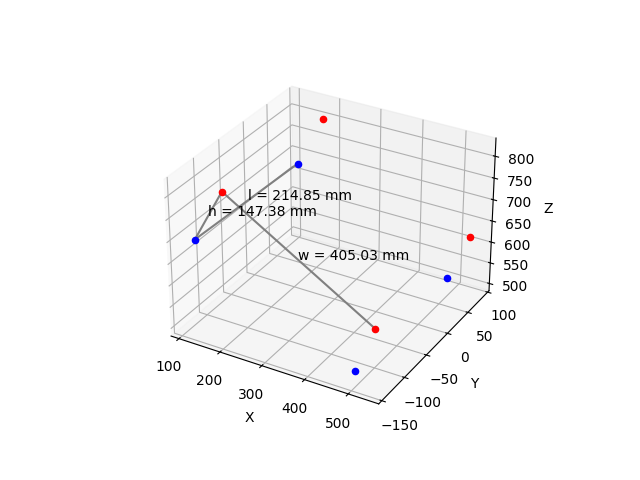

In [2]:
visualize_box_results("dual_sensor/full_resolution/p3ds_bottom.npy", 
                      "dual_sensor/full_resolution/p3ds_top.npy")

## Dual Sensor - Low Resolution (1.9 Reduction)

In [6]:
# calibrate
stereo_cam_params = StereoCameraCalibrator("../calibration_input/dual_sensor_resolution_exps/cal_jun23_d19/LEFT", "../calibration_input/dual_sensor_resolution_exps/cal_jun23_d19/RIGHT", square_size = 22).calibrate()

Calibrating stereo camera...
Calibrating individual camera from objpoints and imgpoints...
Intrinsic Calibration RMS: 1.221370211364693
Calibrating individual camera from objpoints and imgpoints...
Intrinsic Calibration RMS: 0.7385453438613224
Reprojection error (pixels): 2.2144014084235444


In [ ]:
with open(f"../stereo_params/dual_sensor_resolution_exps/dual_sensor_stereo_cam_params_d19.pkl", "rb") as f:
    stereo_cam_params = pickle.load(f)

# undistort the points before triangulating (https://www.mathworks.com/matlabcentral/answers/227891-recitfy-images-before-triangulate-points)
# dont undistort the points for depth from disparity
test_left_points, test_right_points, left_test_img, right_test_img = dual_select_test_correspondences(f"dual_sensor/resolution_d19/box_test_bottom_d19_left.mp4",
                                                                                                f"dual_sensor/resolution_d19/box_test_bottom_d19_right.mp4", 
                                                                                                stereo_cam_params, undistort_frames=True)

for i, uv1 in enumerate(test_left_points):
    cv2.circle(left_test_img, tuple(uv1), 5, colors_list[i % len(colors_list)], -1)
for i, uv2 in enumerate(test_right_points):
    cv2.circle(right_test_img, tuple(uv2), 5, colors_list[i % len(colors_list)], -1)
display = np.hstack((left_test_img, right_test_img))
cv2.imshow('Selected points', display)

p3ds = triangulate(test_left_points, test_right_points, stereo_cam_params, display = True)

cv2.destroyAllWindows()

np.save("dual_sensor/resolution_d19/p3ds_bottom.npy", p3ds)
np.save("dual_sensor/resolution_d19/uvs1_bottom.npy", test_left_points)
np.save("dual_sensor/resolution_d19/uvs2_bottom.npy", test_right_points)


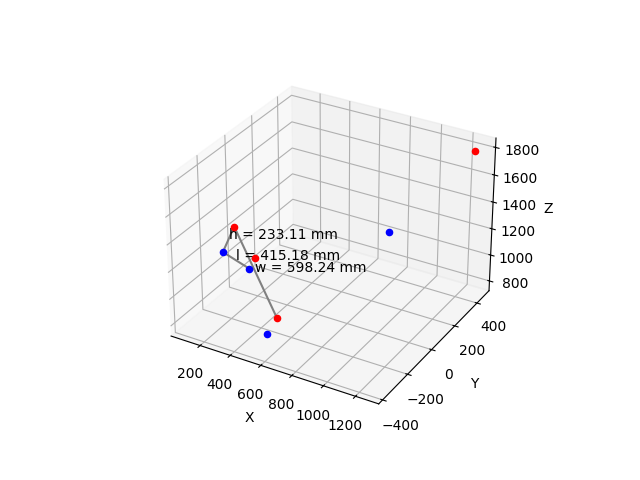

In [4]:
visualize_box_results("dual_sensor/resolution_d19/p3ds_bottom.npy", 
                      "dual_sensor/resolution_d19/p3ds_top.npy")

## Dual Sensor - Low Resolution (1.5 Reduction)

Correspondence recorded
Correspondence recorded
Correspondence recorded
Correspondence recorded
[[ 766  283]
 [1179  248]
 [ 768  454]
 [1180  474]] [[290 257]
 [641 277]
 [293 454]
 [641 445]]
3D points:  [array([ 176.8254202 , -126.70158016,  812.63531552]), array([ 529.23499806, -131.0410812 ,  617.79355367]), array([179.79146423,  89.69050955, 815.24329408]), array([518.47204758,  85.93608815, 604.11086907])]


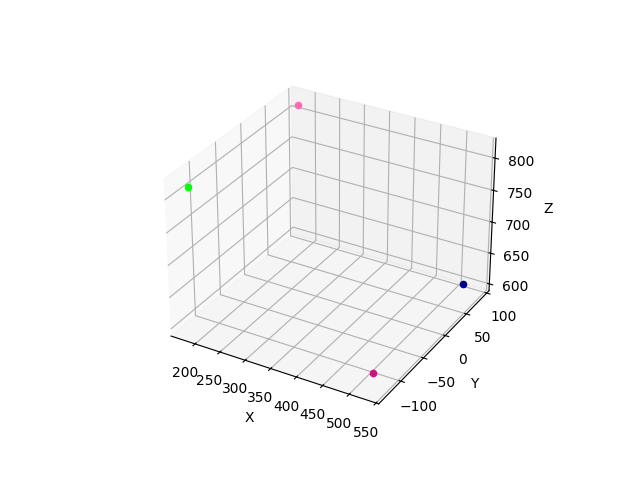

In [5]:
with open(f"../stereo_params/dual_sensor_resolution_exps/dual_sensor_stereo_cam_params_d15.pkl", "rb") as f:
    stereo_cam_params = pickle.load(f)

# undistort the points before triangulating (https://www.mathworks.com/matlabcentral/answers/227891-recitfy-images-before-triangulate-points)
# dont undistort the points for depth from disparity
test_left_points, test_right_points, left_test_img, right_test_img = dual_select_test_correspondences(f"dual_sensor/resolution_d15/box_test_bottom_d15_left.mp4",
                                                                                                f"dual_sensor/resolution_d15/box_test_bottom_d15_right.mp4", 
                                                                                                stereo_cam_params, undistort_frames=True)

for i, uv1 in enumerate(test_left_points):
    cv2.circle(left_test_img, tuple(uv1), 5, colors_list[i % len(colors_list)], -1)
for i, uv2 in enumerate(test_right_points):
    cv2.circle(right_test_img, tuple(uv2), 5, colors_list[i % len(colors_list)], -1)
display = np.hstack((left_test_img, right_test_img))
cv2.imshow('Selected points', display)

p3ds = triangulate(test_left_points, test_right_points, stereo_cam_params, display = True)

cv2.destroyAllWindows()

np.save("dual_sensor/resolution_d15/p3ds_bottom.npy", p3ds)
np.save("dual_sensor/resolution_d15/uvs1_bottom.npy", test_left_points)
np.save("dual_sensor/resolution_d15/uvs2_bottom.npy", test_right_points)


## Single Sensor v1

In [3]:
# calibrate
stereo_cam_params = StereoCameraCalibrator("../calibration_input/single_sensor/cal_jun21_3/LEFT", "../calibration_input/single_sensor/cal_jun21_3/RIGHT", square_size = 29, checkerboard_dims=(5, 8)).calibrate()

Calibrating stereo camera...
Calibrating individual camera from objpoints and imgpoints...
Intrinsic Calibration RMS: 0.4711017099182699
Calibrating individual camera from objpoints and imgpoints...
Intrinsic Calibration RMS: 0.5131365672678401
Reprojection error (pixels): 0.521277491084425


Correspondence recorded
Correspondence recorded
Correspondence recorded
Correspondence recorded
[[288 329]
 [527 321]
 [294 459]
 [535 449]] [[392 377]
 [635 363]
 [394 505]
 [642 499]]
3D points:  [array([-234.10210809, -128.16039118,  838.00836594]), array([ 283.56104331, -193.64366121, 1140.03894009]), array([-333.12117036,  173.43698712, 1251.12253668]), array([ 361.31237677,  155.97579894, 1356.4703951 ])]


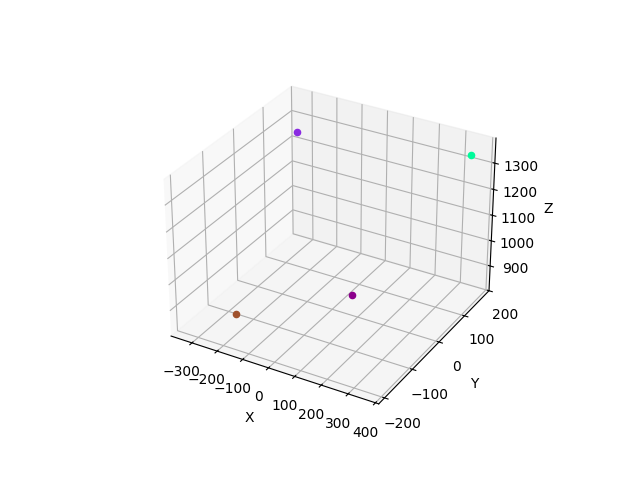

In [2]:
with open(f"../stereo_params/single_sensor_stereo_cam_params.pkl", "rb") as f:
    stereo_cam_params = pickle.load(f)

# undistort the points before triangulating (https://www.mathworks.com/matlabcentral/answers/227891-recitfy-images-before-triangulate-points)
# dont undistort the points for depth from disparity
test_left_points, test_right_points, left_test_img, right_test_img = single_select_test_correspondences(f"single_sensor/box_test_bottom.mp4",
                                                                                                        stereo_cam_params, undistort_frames=True)

for i, uv1 in enumerate(test_left_points):
    cv2.circle(left_test_img, tuple(uv1), 5, colors_list[i % len(colors_list)], -1)
for i, uv2 in enumerate(test_right_points):
    cv2.circle(right_test_img, tuple(uv2), 5, colors_list[i % len(colors_list)], -1)
display = np.hstack((left_test_img, right_test_img))
cv2.imshow('Selected points', display)

p3ds = triangulate(test_left_points, test_right_points, stereo_cam_params, display = True)

cv2.destroyAllWindows()

np.save("single_sensor/p3ds_top.npy", p3ds)
np.save("single_sensor/uvs1_top.npy", test_left_points)
np.save("single_sensor/uvs2_top.npy", test_right_points)


Width2:  965.8498386056007


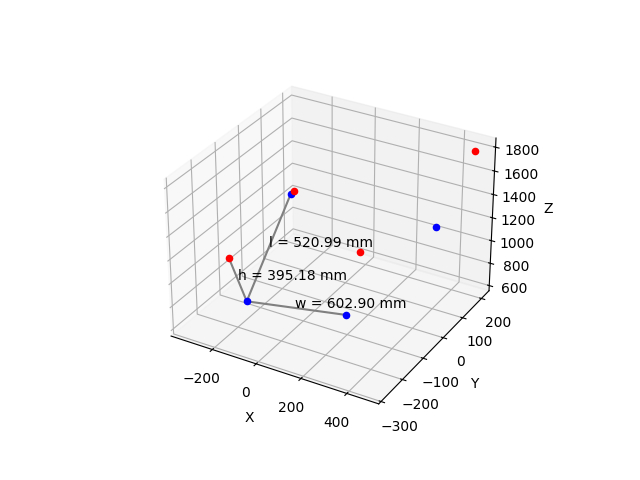

In [2]:
p3ds_top = np.load("single_sensor/p3ds_top.npy")
p3ds_top[:, 2] = p3ds_top[:, 2] - 200
np.save("single_sensor/p3ds_top_mod.npy", p3ds_top)

visualize_box_results("single_sensor/p3ds_bottom.npy", 
                      "single_sensor/p3ds_top_mod.npy")


## Single Sensor v2

In [5]:
# calibrate
stereo_cam_params = StereoCameraCalibrator("../calibration_input/single_sensor_v2/cal_jun24_3/LEFT", "../calibration_input/single_sensor_v2/cal_jun24_3/RIGHT", square_size = 22).calibrate()

Calibrating stereo camera...
Calibrating individual camera from objpoints and imgpoints...
Intrinsic Calibration RMS: 0.9433733283977827
Calibrating individual camera from objpoints and imgpoints...
Intrinsic Calibration RMS: 0.6005035743724758
Reprojection error (pixels): 0.9234211160211209


In [ ]:

with open('../stereo_params/single_sensor_v2_stereo_cam_params_3.pkl', 'rb') as f:
    stereo_cam_params = pickle.load(f)

test_left_points, test_right_points, left_test_img, right_test_img = dual_select_test_correspondences("single_sensor_v2/take3/top/LEFT/40.png", 
                                                                                                 "single_sensor_v2/take3/top/RIGHT/40.png", 
                                                                                                 stereo_cam_params, 
                                                                                                 undistort_frames = True)
for i, uv1 in enumerate(test_left_points):
    cv2.circle(left_test_img, tuple(uv1), 5, colors_list[i % len(colors_list)], -1)
for i, uv2 in enumerate(test_right_points):
    cv2.circle(right_test_img, tuple(uv2), 5, colors_list[i % len(colors_list)], -1)
display = np.hstack((left_test_img, right_test_img))
cv2.imshow('Selected points', display)

p3ds = triangulate(test_left_points, test_right_points, stereo_cam_params, display = True)
cv2.destroyAllWindows()

np.save("single_sensor_v2/take3/p3ds_top.npy", p3ds)
np.save("single_sensor_v2/take3/uvs1_top.npy", test_left_points)
np.save("single_sensor_v2/take3/uvs2_top.npy", test_right_points)

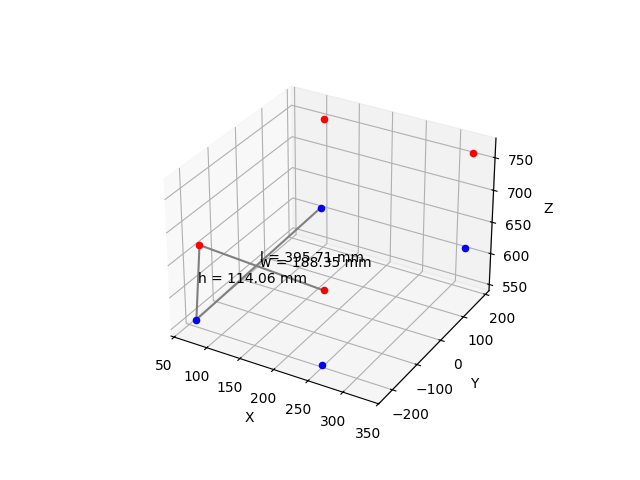

In [3]:
visualize_box_results("single_sensor_v2/take3/p3ds_bottom.npy", 
                      "single_sensor_v2/take3/p3ds_top.npy")
